In [1]:
# Here we will explore trajectories wrt marks clusters
import numpy as np
import pickle
import matplotlib.pyplot as plt

from utils.plotting import (
    plot_divergence,
    build_vector_field,  # mine
    plot_vector_field,  # Lebedev's
    plot_occupancy_plot,
    plot_marks_clusters,
    plot_trajectory,
    plot_wall_sorted_samples
)
from utils.shapely_funcs import (
    marks2shapely,
    plot_intersected_element,
    plot_shapely_traj,
    plot_shapely_marks,
    find_traj_marks_intersections,
    extract_shapely_intersections,
)

In [2]:
DIR = 'preprocessed_dataset'

# load traj
fname = f'{DIR}/splited_isnear_marks.pkl'
with open(fname, 'rb') as f:
    traj_df = pickle.load(f)

# load marks
dfs_names = ['tr3','tr5','tr6','tr7', 'tr91']

marks_df = {}
for k in dfs_names:
    mname = f'{DIR}/marks_{k}_30bin_log.pkl'
    with open(mname, 'rb') as f:
        marks = pickle.load(f)
    marks_df[k] = marks

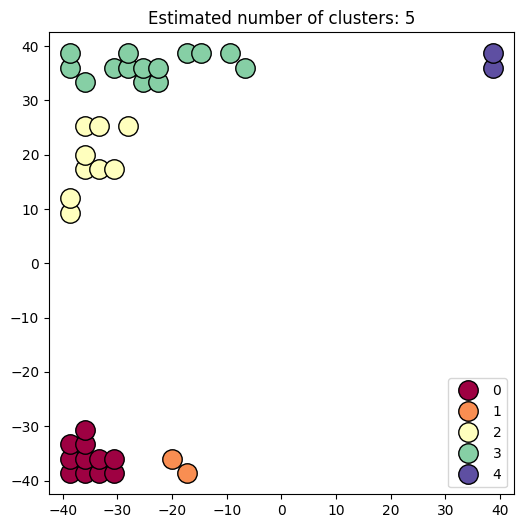

In [39]:
# open marks, classify them for center, walls, corners manually
m = marks_df['tr7']
X = m[['x', 'y']].to_numpy()
c = m['cluster'].to_numpy()
plot_marks_clusters(X, c)

# Classification:
# 'tr3' : wall=[3, 5, 7, 8, 9, 10, 12, 13], corner=[0, 11], 
#         center=[1, 2, 4, 6]
# Note: 1+2+4+6 ?, 5 + 3, 12 + 13, 7 + 8

# 'tr5' : wall=[2, 4, 5, 7, 11, 13], corner=[0, 1, 3, 9, 10, 12],
#         center=[6, 8]
# Note: 9 + 12, 0 + 1, 11 + 13?

# 'tr6' : wall=[2, 3, 4, 5, 6, 8], corner=[0, 1, 7], center=[]
# Note: 0 + 1, 5 + 8, 

# 'tr7' : wall=[1, 2, 3], corner=[0, 3, 4], center=[]
# Note: divide 3 cluster into 2 - wall\corner 

# 'tr91': wall=[], corner=[], center=[]
# Note: this is kind a control mice? Skip for now

For tr3


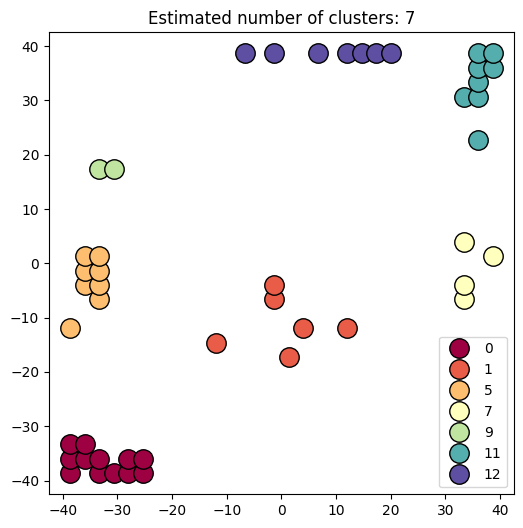

For tr5


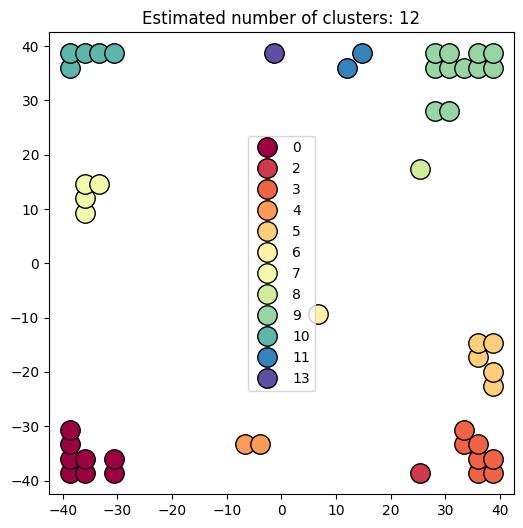

For tr6


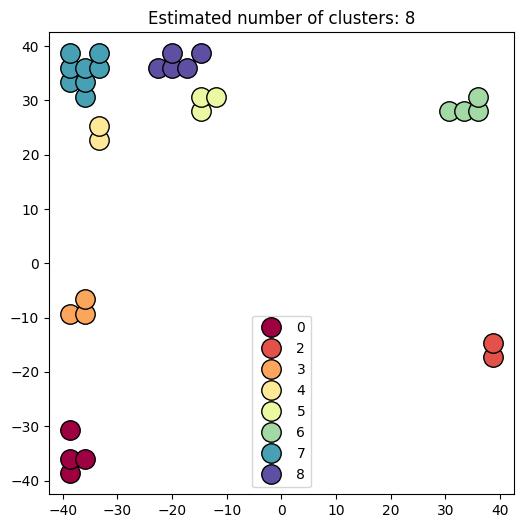

For tr7


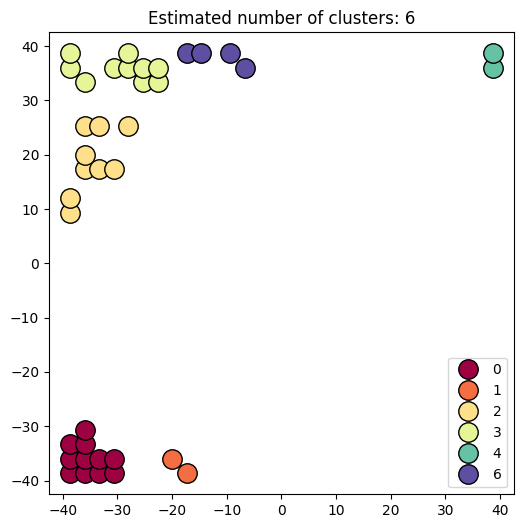

In [44]:
# Fix all marks manually
fixed_mark = {}
dfs_names = ['tr3','tr5','tr6','tr7']

# tr3: ========================================
m = marks_df['tr3']
m_ = m.copy()

i = m.loc[m['cluster']==3].index
m_.loc[i, 'cluster'] = 5

i = m.loc[(m['cluster']==1) | (m['cluster']==2) | (m['cluster']==4) | (m['cluster']==6)].index
m_.loc[i, 'cluster'] = 1

i = m.loc[m['cluster']==13].index
m_.loc[i, 'cluster'] = 12

i = m.loc[m['cluster']==8].index
m_.loc[i, 'cluster'] = 7

i = m.loc[m['cluster']==10].index
m_.loc[i, 'cluster'] = 11

X = m_[['x', 'y']].to_numpy()
c = m_['cluster'].to_numpy()
print('For tr3')
plot_marks_clusters(X, c)

fixed_mark['tr3'] = m_


# tr5: ========================================
m = marks_df['tr5']
# 9 + 12 
i = m.loc[m['cluster']==12].index
m_ = m.copy()
m_.loc[i, 'cluster'] = 9

# 0 + 1
i = m.loc[m['cluster']==1].index
m_.loc[i, 'cluster'] = 0

X = m_[['x', 'y']].to_numpy()
c = m_['cluster'].to_numpy()
print('For tr5')
plot_marks_clusters(X, c)
fixed_mark['tr5'] = m_

# tr6: ========================================
m = marks_df['tr6']
m_ = m.copy()

i = m.loc[m['cluster']==1].index
m_.loc[i, 'cluster'] = 0

X = m_[['x', 'y']].to_numpy()
c = m_['cluster'].to_numpy()
print('For tr6')
plot_marks_clusters(X, c)
fixed_mark['tr6'] = m_

# tr7: ========================================
m = marks_df['tr7']
m_ = m.copy()

i = m.loc[(m['cluster']==3) & (m['x'] > -20)].index
m_.loc[i, 'cluster'] = 6

X = m_[['x', 'y']].to_numpy()
c = m_['cluster'].to_numpy()
print('For tr7')
plot_marks_clusters(X, c)
fixed_mark['tr7'] = m_


savename = f'{DIR}/marks_all_fixed_30bin_log.pkl'
with open(savename, 'wb') as fp:    # NOTE: uncomment to save
    pickle.dump(fixed_mark, fp)

In [ ]:
# Create poly from mark points 

# TODO: some mark-polygons (e.g. tr6) are 1 or 2 points,
#       so we have to use other func to create a poly here 

In [ ]:
# strength of marks wrt area?

# extract strength wrt cluster - make heatmap-polygon
# plot

In [ ]:
# manually make polygons without marks for comparison



In [ ]:
# take stats from data
